### [ 2025-11-04 데이터 분석 및 시각화 ]
- 데이터 : titanic_train.csv
- (1) 생존자의 연령
- (2) 생존자의 성별
- (3) 생존자들의 연령과 성별 분석
- (4) 등석에 따른 생존자 분석

-> 각각의 그래프 만들고, 후에 합쳐서 각각의 관계에 따른 값 비교하기

[주의]
- 의미없는 그래프 X
- 문제별로 타겟 컬럼/피쳐컬럼 선정

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
df = pd.read_csv('../DATA/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## 데이터 정보 확인하기
display(df.info())

## 결측치 데이터 확인하기
a = df.isna().sum()
a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1번 <hr>

C:\Users\qjadl\AppData\Local\Temp\ipykernel_13132\439361680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur_age.dropna(inplace=True)


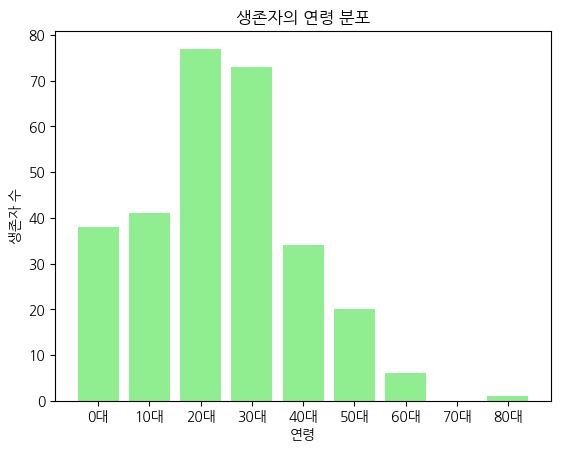

In [104]:
## x -> 연령 / y -> 생존자 수
## (1) 생존자의 연령
# 생존자 추출
df_sur = df[ df.Survived == 1 ]

# 연령 값 뽑아내서 Series로 만들기
df_sur_age = df_sur.Age
df_sur_age.dropna(inplace=True)
# display(df_sur_age)

for i in range(1,10):
    k = df_sur_age[ (df_sur_age.values >= (i-1)*10) & (df_sur_age.values < (i)*10) ]
    sur_n = len(k)
    # print(sur_n)
    idx = ['0대','10대','20대','30대','40대','50대','60대','70대','80대']
    plt.bar(idx[i-1], sur_n, color='lightgreen')
    

plt.title('생존자의 연령 분포')
plt.ylabel('생존자 수')
plt.xlabel('연령')

plt.show()

## 2번 <hr>

C:\Users\qjadl\AppData\Local\Temp\ipykernel_13132\1052840330.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur_sex.dropna(inplace=True)


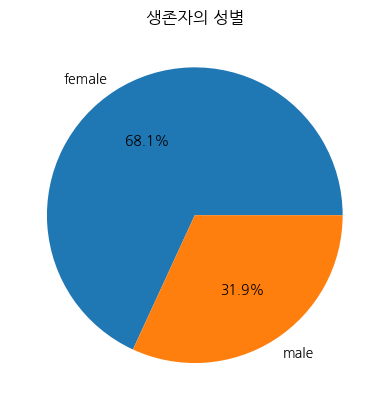

In [ ]:
##### -----------------------------------------------------------------------------
## 여자와 남자가 전체 대비 몇명정도 살았는지 비교해주면 더 객관적 판단히 수월할것으로 보임
##### -----------------------------------------------------------------------------


## (2) 생존자의 성별 -> pie로 구성
# 생존자 추출
df_sur = df[ df.Survived == 1 ]

# 연령 값 뽑아내서 Series로 만들기
df_sur_sex = df_sur.Sex
df_sur_sex.dropna(inplace=True)

## 남자 여자 생존자 수 구해서 pie에 넣기 -> 형태는 lise
sur = []
ret1 = df_sur_sex[df_sur_sex == 'female']
sur.append(len(ret1))
ret2 = df_sur_sex[df_sur_sex == 'male']
sur.append(len(ret2))

labels = ['female', 'male']

plt.pie(sur, labels=labels, autopct='%1.1f%%')

plt.title('생존자의 성별')
plt.show()

## 3번 <hr>

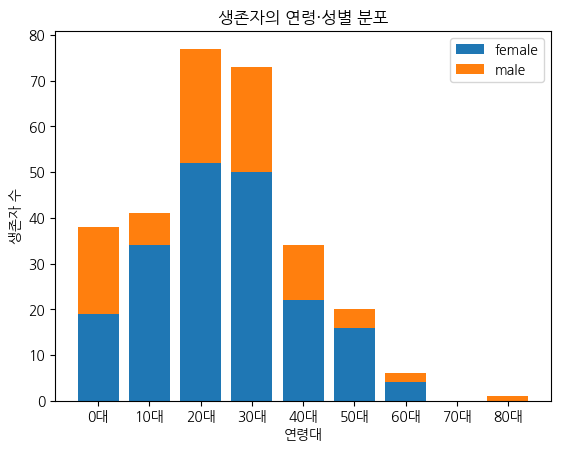

In [111]:
# (3) 생존자들의 연령과 성별 분석
df_sur = df[df.Survived == 1]

df_sur_age = df_sur[['Age','Sex']].dropna()

female_list = []
male_list = []

idx = ['0대','10대','20대','30대','40대','50대','60대','70대','80대']

for i in range(1, 10):
    k = df_sur_age[(df_sur_age['Age'] >= (i-1)*10) & (df_sur_age['Age'] < i*10)]
    
    female = (k['Sex'] == 'female').sum()
    male   = (k['Sex'] == 'male').sum()
    
    female_list.append(female)
    male_list.append(male)

# x 위치: 0 ~ 8
x = range(9)

# 스택 바: 여성 먼저, 그 위에 남성
plt.bar(x, female_list, label='female')                           # 아래        # 차례대로 X위치 , 막대 높이
plt.bar(x, male_list, bottom=female_list, label='male')           # 위에 쌓기

plt.xticks(x, idx)
plt.title('생존자의 연령·성별 분포')
plt.xlabel('연령대')
plt.ylabel('생존자 수')
plt.legend()
plt.show()


## 4번 <hr>

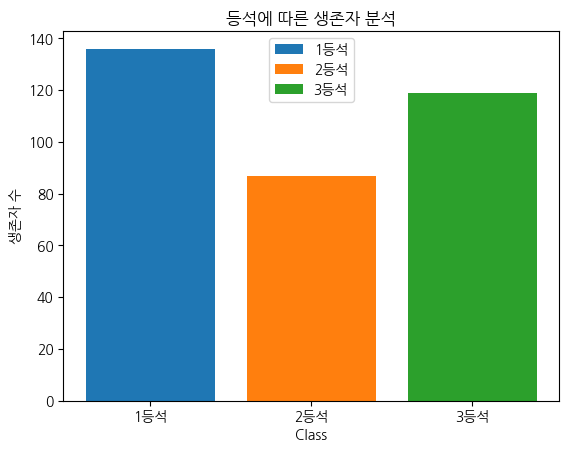

In [129]:
# (4) 등석에 따른 생존자 분석
df_sur = df[ df.Survived == 1 ]
## 1등석 생존자 수
df_class1 = (df_sur.Pclass == 1).sum()
df_class2 = (df_sur.Pclass == 2).sum()
df_class3 = (df_sur.Pclass == 3).sum()

# display(df_class1,df_class2,df_class3)

plt.bar(0,df_class1,label='1등석')
plt.bar(1,df_class2,label='2등석')
plt.bar(2,df_class3,label='3등석')

plt.title('등석에 따른 생존자 분석')
plt.xticks([0,1,2],['1등석','2등석','3등석'])

plt.xlabel('Class')
plt.ylabel('생존자 수')
plt.legend()
plt.show()

plt.show()